<a href="https://colab.research.google.com/github/DishaAndre/DataMining_Warehousing_Sem5/blob/main/Apirori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'TID':[1,2,3,4,5], 'Items':[['pen','pencil'],['pen','eraser','pencil'],['eraser','pencil','scale'],['pen','scale'],['pen','eraser','scale']]})
df

,TID,Items
0,1,"[pen, pencil]"
1,2,"[pen, eraser, pencil]"
2,3,"[eraser, pencil, scale]"
3,4,"[pen, scale]"
4,5,"[pen, eraser, scale]"


In [ ]:
contents = []
for i in df['Items']:
    for j in i:
        contents.append(j)
contents = list(set(contents))
contents

['pen', 'scale', 'pencil', 'eraser']

In [ ]:
count_of_each = {}
for i in contents:
    count = 0
    for j in df['Items']:
        if i in j:
            count += 1
    count_of_each[i] = count
count_of_each

{'pen': 4, 'scale': 3, 'pencil': 3, 'eraser': 3}

In [ ]:
combinations = []
for i in range(len(contents)):
    for j in range(i + 1, len(contents)):
        combinations.append((contents[i], contents[j]))

print("Combinations of items:")
print(combinations)

Combinations of items:
[('pen', 'scale'), ('pen', 'pencil'), ('pen', 'eraser'), ('scale', 'pencil'), ('scale', 'eraser'), ('pencil', 'eraser')]


In [ ]:
count_of_combinations = {}
for combo in combinations:
    count = 0
    for items_list in df['Items']:
        if all(item in items_list for item in combo):
            count += 1
    count_of_combinations[combo] = count

print("\nCounts of each combination:")
print(count_of_combinations)


Counts of each combination:
{('pen', 'scale'): 2, ('pen', 'pencil'): 2, ('pen', 'eraser'): 2, ('scale', 'pencil'): 1, ('scale', 'eraser'): 2, ('pencil', 'eraser'): 2}


In [ ]:
filtered_combinations = {combo: count for combo, count in count_of_combinations.items() if count >= 2}

print("Filtered combinations (count >= 2):")
print(filtered_combinations)

Filtered combinations (count >= 2):
{('pen', 'scale'): 2, ('pen', 'pencil'): 2, ('pen', 'eraser'): 2, ('scale', 'eraser'): 2, ('pencil', 'eraser'): 2}


In [ ]:
def analyze_associations(filtered_combinations, total_transactions, count_of_each):
    associations = []
    for combo, count in filtered_combinations.items():
        item1, item2 = combo

        # Calculate Support
        support = round(count / total_transactions, 3)

        # Calculate Confidence (for item1 -> item2)
        confidence_item1_item2 = round(count / count_of_each[item1], 3)

        # Calculate Confidence (for item2 -> item1)
        confidence_item2_item1 = round(count / count_of_each[item2], 3)

        # Calculate Lift (for item1 -> item2)
        lift_item1_item2 = round(confidence_item1_item2 / (count_of_each[item2] / total_transactions), 3)

        # Calculate Lift (for item2 -> item1)
        lift_item2_item1 = round(confidence_item2_item1 / (count_of_each[item1] / total_transactions), 3)

        # Determine association type
        if lift_item1_item2 > 1 or lift_item2_item1 > 1:
            association_type = "Positive Association"
        elif lift_item1_item2 < 1 or lift_item2_item1 < 1:
            association_type = "Negative Association"
        else:
            association_type = "Neutral Association"

        associations.append({
            "Combination": f"{item1}, {item2}",
            "Support": support,
            f"Confidence ({item1} -> {item2})": confidence_item1_item2,
            f"Confidence ({item2} -> {item1})": confidence_item2_item1,
            f"Lift ({item1} -> {item2})": lift_item1_item2,
            f"Lift ({item2} -> {item1})": lift_item2_item1,
            "Association Type": association_type
        })
    return associations


# Get total transactions
total_transactions = len(df)

# Analyze associations
association_results = analyze_associations(filtered_combinations, total_transactions, count_of_each)

# Print results vertically
for i, result in enumerate(association_results, 1):
    print(f"\nAssociation Rule {i}")
    print("-" * 40)
    for key, value in result.items():
        print(f"{key:25}: {value}")



Association Rule 1
----------------------------------------
Combination              : pen, scale
Support                  : 0.4
Confidence (pen -> scale): 0.5
Confidence (scale -> pen): 0.667
Lift (pen -> scale)      : 0.833
Lift (scale -> pen)      : 0.834
Association Type         : Negative Association

Association Rule 2
----------------------------------------
Combination              : pen, pencil
Support                  : 0.4
Confidence (pen -> pencil): 0.5
Confidence (pencil -> pen): 0.667
Lift (pen -> pencil)     : 0.833
Lift (pencil -> pen)     : 0.834
Association Type         : Negative Association

Association Rule 3
----------------------------------------
Combination              : pen, eraser
Support                  : 0.4
Confidence (pen -> eraser): 0.5
Confidence (eraser -> pen): 0.667
Lift (pen -> eraser)     : 0.833
Lift (eraser -> pen)     : 0.834
Association Type         : Negative Association

Association Rule 4
----------------------------------------
Combinati

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

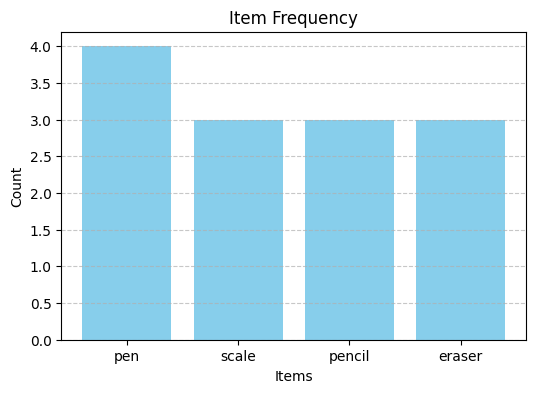

In [ ]:
# Item frequency bar chart
plt.figure(figsize=(6, 4))
plt.bar(count_of_each.keys(), count_of_each.values(), color='skyblue')
plt.title("Item Frequency")
plt.xlabel("Items")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-3240428651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combo_labels, y=combo_counts, palette="viridis")


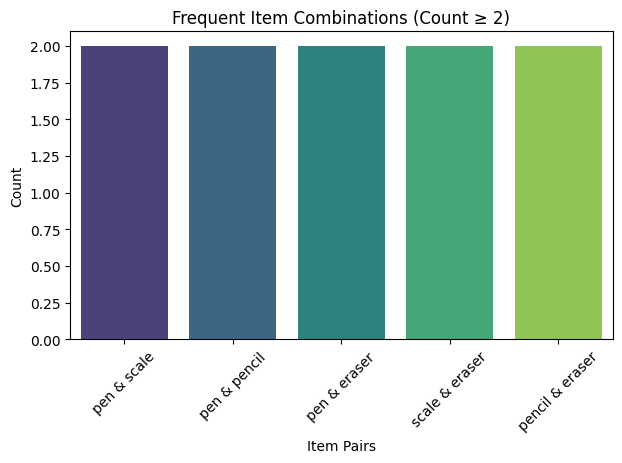

In [ ]:
# Combination frequency bar chart
combo_labels = [f"{a} & {b}" for (a, b) in filtered_combinations.keys()]
combo_counts = list(filtered_combinations.values())

plt.figure(figsize=(7, 4))
sns.barplot(x=combo_labels, y=combo_counts, palette="viridis")
plt.title("Frequent Item Combinations (Count ≥ 2)")
plt.xlabel("Item Pairs")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
